# Introduction: Dan Ariely & Driving Data

##### Numerous documents required by corporations and governmental entities depend on accurate self-reporting. Usually, a signature at the document's conclusion, such as on tax documents or insurance forms, serves as a declaration of truthful reporting. However, to benefit financially, individuals may still resort to deception, which incurs substantial societal costs. A 2012 study explored a straightforward strategy to curb such dishonesty: placing the signature at the document's start rather than its end, effectively inverting the conventional sequence.

##### In the study, Approximately 13,500 drivers were sent one of two policy review forms randomly: one featuring the standard placement of the statement "I promise that the information I am providing is true" at the document's bottom, while the other had the statement relocated to the top.

##### In the forms, they were asked to report the odometer mileage of their cars covered by the insurer, based on the hypothesis that individuals are inherently motivated to lie on these forms, as reporting lower mileage implies lower insurance premiums.

##### See their data below.

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from scipy.stats import logistic
from scipy import stats

driving = pd.read_excel("data/driving.xls")
driving

,OMR Version,Policy # (masked),Odom Reading 1 (Previous),Odom Reading 1 (Update),Odom Reading 2 (Previous),Odom Reading 2 (Update),Odom Reading 3 (Previous),Odom Reading 3 (Update),Odom Reading 4 (Previous),Odom Reading 4 (Update),Odom Reading All (Previous),Odom Reading All (Update),Diff All,Count1,Count2,Count3,Count4,#Cars in Policy
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,896.0,39198.0,38302.0,1,0,0,0,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,27027.5,55558.0,28530.5,1,1,0,0,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,33169.0,48231.0,15062.0,1,1,0,0,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,23912.0,59136.0,35224.0,1,0,0,0,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,16862.0,59292.0,42430.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,Sign Top,13484,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,31680.5,54183.5,22503.0,1,1,0,0,2
13484,Sign Top,13485,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,11536.5,41911.5,30375.0,1,0,0,1,2
13485,Sign Bottom,13486,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,60190.0,86243.0,26053.0,1,1,0,0,2
13486,Sign Top,13487,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,29884.0,35459.0,5575.0,1,0,0,0,1


# Question 1a

To make the data easier to work with, let's examine the 'Odom Reading All (Previous)' column and the 'Odom Reading All (update)' column. These represent the mean previous and updated odometer readings across readings 1, 2, 3, and 4.

Your task: Drop all unecessary columns or select just the ones we want to work with, specified above. Assign the resulting dataframe to driving. Note that this means we are replacing the original dataframe with this new one.

In [4]:
all_columns = driving.columns
driving = driving.drop(axis=1, labels=all_columns[2:10])
driving

,OMR Version,Policy # (masked),Odom Reading All (Previous),Odom Reading All (Update),Diff All,Count1,Count2,Count3,Count4,#Cars in Policy
0,Sign Top,1,896.0,39198.0,38302.0,1,0,0,0,1
1,Sign Bottom,2,27027.5,55558.0,28530.5,1,1,0,0,2
2,Sign Bottom,3,33169.0,48231.0,15062.0,1,1,0,0,2
3,Sign Bottom,4,23912.0,59136.0,35224.0,1,0,0,0,1
4,Sign Bottom,5,16862.0,59292.0,42430.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
13483,Sign Top,13484,31680.5,54183.5,22503.0,1,1,0,0,2
13484,Sign Top,13485,11536.5,41911.5,30375.0,1,0,0,1,2
13485,Sign Bottom,13486,60190.0,86243.0,26053.0,1,1,0,0,2
13486,Sign Top,13487,29884.0,35459.0,5575.0,1,0,0,0,1


# Question 1b
We want to investigate whether signing on the bottom or top affects the surveyed participant's likeliness to be honest. This is a difficult metric to measure! In the `driving` table, which column most likely represents how the scientists quantified "honesty"? 

[Hint: participants might have an incentive to lie about their updated odometer readings because *lower odometer readings = lower insurance premiums*]

In [8]:
quant_honest = "Diff All"

Based on your previous answer, let's plot the distribution of this column.

<Axes: xlabel='Diff All', ylabel='Density'>

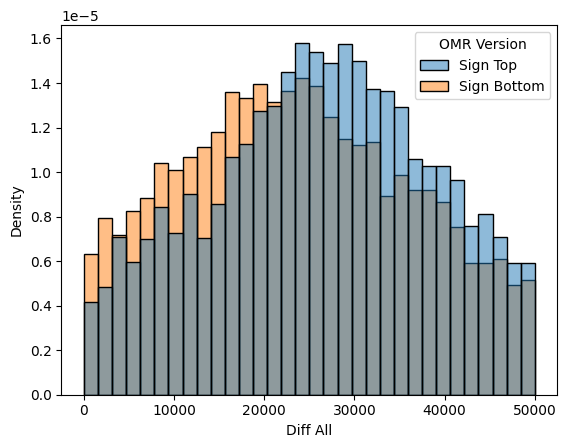

In [13]:
# not sure if students should know how to do this or not, but could make it a question
sns.histplot(data=driving, x=quant_honest, hue="OMR Version", stat="density")

# Question 2
Based off the above visualization, comment on how the two categories ("Sign Top", and "Sign Bottom") are different or similar.

type your answer here

# Question 3a
Let's see if hypothesis testing can give us a clearer picture on how the two distributions compare to each other. 

[I'm thinking of having students do A/B testing (ex. switching up the sign top/bottom labels to compare the two groups). The p-value should be significant b/c this dataset is allegedly fabricated.]

# Question 4
Based off your calculated p-value, is the data consistent with the null hypothesis? Assign reject to `True` if we should reject the null hypothesis or `False` if our data is consistent with it.

In [14]:
reject = True

# More information about the provided dataset
##### talk about how it was fabricated and the paper was retracted.
Based on this new information, are you still confident with your previous answer?

# Question 5: Reflection on p-hacking, fraudulent science, and more
